<a href="https://colab.research.google.com/github/Burgunthy/Stock_Project/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
krx_list = pd.read_html('./drive/MyDrive/Colab Notebooks/Stock_Project/상장법인목록.xls')
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,네패스아크,330860,"그외 기타 전문, 과학 및 기술 서비스업",반도체 테스트 서비스,2020-11-17,12월,이창우,http://nepesark.co.kr,충청북도
1,교촌에프앤비,339770,음·식료품 및 담배 도매업,치킨 프랜차이즈,2020-11-12,12월,소진세,http://kyochonfnb.com,경상북도
2,소룩스,290690,전구 및 조명장치 제조업,"실내등(형광등, LED등), 실외등, 특수등",2020-11-06,12월,김복덕,http://www.solux.co.kr,충청남도
3,위드텍,348350,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외","AMCs 모니터링 시스템, 공정 프로세스 모니터링 시스템, TMS",2020-10-30,12월,유승교,http://www.withtech.co.kr,대전광역시
4,센코,347000,전자부품 제조업,"가스센서 및 모듈, 휴대용 및 고정형 가스검지기, 악취 & 미세먼지 모니터링 시스템",2020-10-29,12월,하승철,http://www.senko.co.kr,경기도
...,...,...,...,...,...,...,...,...,...
2383,CJ대한통운,120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시
2384,메리츠화재,60,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2385,경방,50,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2386,유수홀딩스,700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [2]:
# map 함수를 통한 0을 앞에 저장
krx_list[0].종목코드 = krx_list[0].종목코드.map('{:06d}'.format)
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,네패스아크,330860,"그외 기타 전문, 과학 및 기술 서비스업",반도체 테스트 서비스,2020-11-17,12월,이창우,http://nepesark.co.kr,충청북도
1,교촌에프앤비,339770,음·식료품 및 담배 도매업,치킨 프랜차이즈,2020-11-12,12월,소진세,http://kyochonfnb.com,경상북도
2,소룩스,290690,전구 및 조명장치 제조업,"실내등(형광등, LED등), 실외등, 특수등",2020-11-06,12월,김복덕,http://www.solux.co.kr,충청남도
3,위드텍,348350,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외","AMCs 모니터링 시스템, 공정 프로세스 모니터링 시스템, TMS",2020-10-30,12월,유승교,http://www.withtech.co.kr,대전광역시
4,센코,347000,전자부품 제조업,"가스센서 및 모듈, 휴대용 및 고정형 가스검지기, 악취 & 미세먼지 모니터링 시스템",2020-10-29,12월,하승철,http://www.senko.co.kr,경기도
...,...,...,...,...,...,...,...,...,...
2383,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시
2384,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2385,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2386,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [3]:
# NAVER 주가 그래프 그리기

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

url = 'https://finance.naver.com/item/sise_day.nhn?code=035420&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml') 
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]  

In [4]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=035420'

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)  
    df = df.append(pd.read_html(page_url, header=0)[0])

df = df.dropna()
# 값 빠진 항 제거

print(df)

            날짜        종가      전일비        시가        고가        저가        거래량
1   2020.11.17  275000.0   3000.0  277500.0  278000.0  273500.0   813970.0
2   2020.11.16  278000.0   3000.0  282500.0  283000.0  277500.0   887878.0
3   2020.11.13  281000.0   2000.0  277500.0  282000.0  277500.0   710865.0
4   2020.11.12  279000.0   1000.0  283000.0  285500.0  279000.0  1016673.0
5   2020.11.11  280000.0   3000.0  281000.0  283000.0  277500.0  1183499.0
..         ...       ...      ...       ...       ...       ...        ...
2   2002.11.04   20850.0   1100.0   21750.0   21900.0   20325.0   692165.0
3   2002.11.01   21950.0   1450.0   24000.0   24750.0   21100.0   750761.0
4   2002.10.31   23400.0   1225.0   25000.0   25600.0   22825.0  1320880.0
5   2002.10.30   24625.0   2625.0   24625.0   24625.0   24350.0   853638.0
9   2002.10.29   22000.0  11000.0   22000.0   22000.0   22000.0    20549.0

[4466 rows x 7 columns]


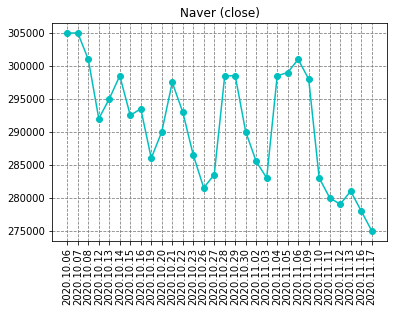

In [6]:
df = df.iloc[0:30] 
df = df.sort_values(by='날짜') 

plt.title('Naver (close)')
plt.xticks(rotation=90) 
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

In [7]:
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
# df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [ ]:
pip install mplfinance

In [11]:
import mplfinance as mpf

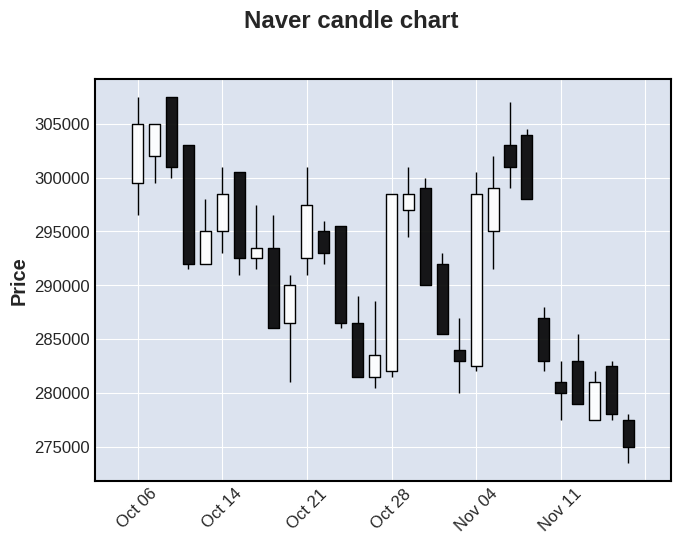

In [16]:
mpf.plot(df, title='Naver candle chart', type='candle')

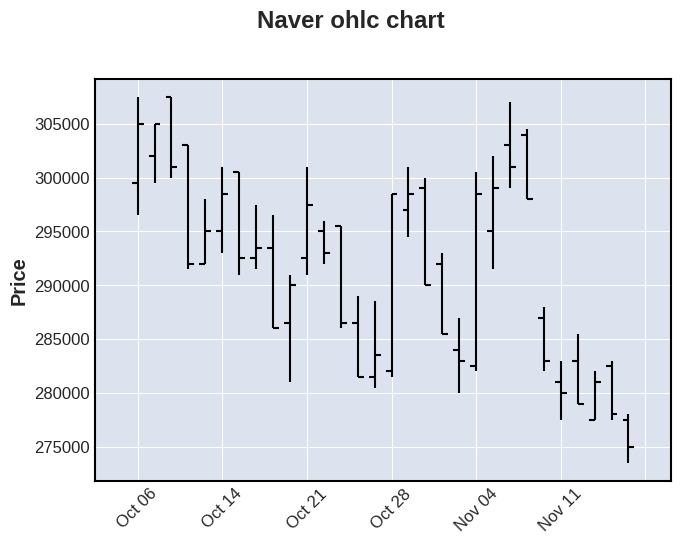

In [17]:
mpf.plot(df, title='Naver ohlc chart', type='ohlc')

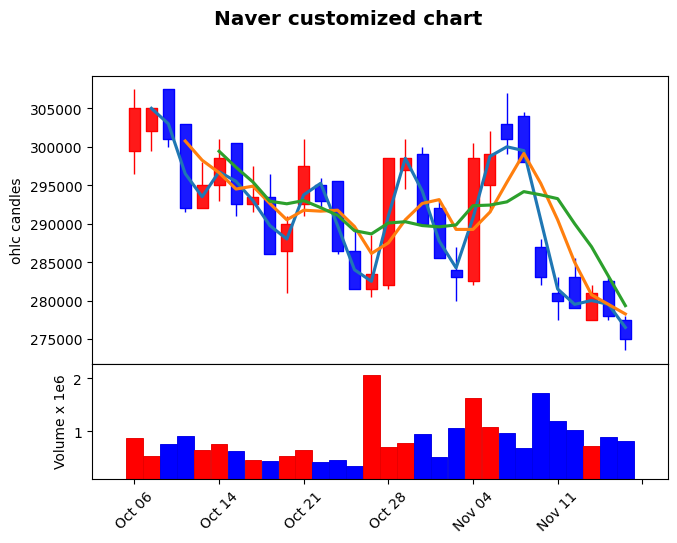

In [15]:
kwargs = dict(title='Naver customized chart', type='candle',
    mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)